# Введение в анализ данных, ИАД-4

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил: Пешков Максим

### Общая информация

__Дата выдачи:__ 05.03.2020

__Дедлайн:__ 19.03.2020 23:59

### О задании

В этом домашнем задании вы реализуете алгоритм kNN и линейную регрессию, попрактикуетесь в решении задачи регрессии, а также решите теоретические задачи.

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / 18,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 18, а максимальное число дополнительных баллов, которые пойдут в бонус — 2. Бонусные задания отмечены звездочками (*).

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-4: zG1cIyT

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

# kNN своими руками (5)

В этом задании вам предстоит реализовать взвешенный алгоритм kNN для регрессии. Пусть необходимо вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

### Реализуйте две функции расстояния (1 балл)
- евклидова метрика **(0.5 балла)**
- метрика Манхэттена **(0.5 балла)**

Обе функции должны на вход получать матрицу `np.array of shape(n, m)` и вектор `np.array of shape(m,)`, а возвращать вектор расстояний от каждой строчки матрицы до вектора `np.array of shape(n,)`

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy.** 

In [331]:
import numpy as np

In [332]:
def euclidian_metric(X, x):
    mat_1 = (X-x)**2
    distances = np.sqrt(np.sum(mat_1, axis=1))
    return distances

def manhattan_metric(X, x):
    mat_2 = abs(X-x)
    distances = np.sum(mat_2, axis=1)
    return distances

In [333]:
# проверка
X = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]])
y = np.ones(3)

assert np.allclose(euclidian_metric(X, y), np.array([ 2.23606798,  8.77496439, 13.92838828]))
assert np.allclose(manhattan_metric(X, y), np.array([ 3., 15., 24.]))

### Реализуйте алгоритм kNN для регрессии (4 балла)

- реализуйте класс kNN для равномерных весов (то есть $w_1 = \ldots = w_k$) **(3 балла)**
- добавьте возможность передать данному классу параметр `weights='distance'` для вызова взвешенной версии алгоритма kNN (то есть $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$ **(1 балл)**

Для начала зададим метрики для многомерного случая, из которых будем выбирать самые большие веса (что равносильно наименьшим расстояниям)

In [334]:
def euclid(X, vector, k):
    weights = []
    for i in range(len(X)):
        dist = 0
        for j in range(len(X[i])):
            dist += (X[i][j] - vector[j])**2
        if dist == 0:
            global index 
            index = i
            raise ZeroDivisionError
        weights.append((i, 1/(dist ** 0.5)))
    weights.sort(key = lambda x: x[1], reverse=True)
    return weights[:k]

In [335]:
def manhattan(X, vector, k):
    weights = []
    for i in range(len(X)):
        dist = 0
        for j in range(len(X[i])):
            dist = abs(X[i][j] - vector[j])
        if dist == 0:
            global index 
            index = i
            raise ZeroDivisionError
        weights.append((i, 1/(dist ** 0.5)))
    weights.sort(key = lambda x: x[1], reverse=True)
    return weights[:k]

In [336]:
class KNN:
    def __init__(self, metric='euclid', k=5, weights='uniform'):
      
        self.metric = metric
        self.k = k
        self.weights = weights
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        
        self.X_train = X_train
        self.y_train = y_train
        return self

        
    def predict(self, X_test):
        
        weight = []
        y_pred = np.zeros(len(X_test))
        #для евклидовой метрики
        if self.metric == 'euclid':
            for i in range(len(X_test)):
                try:
                    weight.append(euclid(self.X_train, X_test[i], self.k))
                except ZeroDivisionError:
                    y_pred[i] = self.y_train[i]
            for item in range(len(weight)):
                if y_pred[item] == 0:
                    weights_res = 0
                    y_result = 0
                    #сначала для весов, которые являются обратными к расстоянию
                    if self.weights == 'distance':
                        for j in weight[item]:
                            y_result += j[1]*self.y_train[j[0]]
                            weights_res += j[1]
                        y_pred[item] = y_result/weights_res
                    #а здесь для равномерных, которые будут сокращаться, только в знаменателе останется количество соседей k
                    elif self.weights == 'uniform':
                        for j in weight[item]:
                            y_result += self.y_train[j[0]]
                        y_pred[item] = y_result/self.k
                else:
                    pass
        #для манхэтеннской метрики
        elif self.metric == 'manhattan':
            for i in range(len(X_test)):
                try:
                    weight.append(manhattan(self.X_train, X_test[i], self.k))
                except ZeroDivisionError:
                    y_pred[i] = self.y_train[i]
            for item in range(len(weight)):
                if y_pred[item] == 0:
                    weights_res = 0
                    y_result = 0
                    if self.weights == 'distance':
                        for j in weight[item]:
                            y_result += j[1]*self.y_train[j[0]]
                            weights_res += j[1]
                        y_pred[item] = y_result/weights_res
                    elif self.weights == 'uniform':
                        for j in weight[item]:
                            y_result += self.y_train[j[0]]
                        y_pred[item] = y_result/self.k
                else:
                    pass
                
        return y_pred

Сверьте для нескольких комбинаций различных гиперпараметров свой результат на искусственной выборке с результатом соответствующего алгоритма из `sklearn`. **Не забудьте про гиперпараметр `weights`.**

In [337]:
np.random.seed(13)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

In [338]:
my_knn_uniform = KNN(k = 5)
my_knn_uniform.fit(X_train, y_train)
y1_pred_uniform = my_knn_uniform.predict(X_test)

In [339]:
from sklearn.neighbors import KNeighborsRegressor

In [340]:
from sklearn.metrics import mean_squared_error

In [341]:
true_knn_uniform = KNeighborsRegressor(n_neighbors=5)
true_knn_uniform.fit(X_train, y_train)
y2_pred_uniform = true_knn_uniform.predict(X_test)

In [342]:
print('MSE мой KNN для uniform: ', mean_squared_error(y_test ,y1_pred_uniform))
print('MSE KNN sklearn для uniform: ', mean_squared_error(y_test ,y2_pred_uniform))

MSE мой KNN для uniform:  1.2508868032916385
MSE KNN sklearn для uniform:  1.2508868032916385


In [343]:
my_knn_distance = KNN(k = 5, weights = 'distance')
my_knn_distance.fit(X_train, y_train)
y1_pred_distance = my_knn_distance.predict(X_test)

In [344]:
true_knn_distance = KNeighborsRegressor(n_neighbors=5, weights = 'distance')
true_knn_distance.fit(X_train, y_train)
y2_pred_distance = true_knn_distance.predict(X_test)

In [345]:
print('MSE мой KNN для distance: ', mean_squared_error(y_test ,y1_pred_distance))
print('MSE KNN sklearn для distance: ', mean_squared_error(y_test ,y2_pred_distance))

MSE мой KNN для distance:  1.2511100369876107
MSE KNN sklearn для distance:  1.2511100369876107


# Линейная регрессия своими руками (5)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

*Чему будет равен градиент этой функции по $w$? Вспомните, что за вектор $\hat{y}$ и как он зависит от $X$ и $w$.*

Эти ссылки могут показаться вам полезными:
- https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture02-linregr.pdf
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://stats.stackexchange.com/questions/312737/mean-absolute-error-mae-derivative

In [346]:
import matplotlib.pyplot as plt

%matplotlib inline

### Реализуйте функцию потерь Хьюбера для одного примера и ее градиент по весам (1.5 балла)

- функция потерь **(0.5 балла)**
- градиент **(1 балл)**

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy. Однако можно использовать оператор if.**

In [347]:
def huber_loss(x, y, w, delta):
    
    y1 = np.dot(x, w)
    
    if abs(y-y1) <= delta:
        return ((y - y1) ** 2) / 2
    else:
        return (abs(delta * (y - y1)) - (delta ** 2) / 2)
    pass

def huber_grad(x, y, w, delta):
    
    y1 = np.dot(x, w)
    if abs(y-y1) <= delta:
        return x * (y1-y)
    elif y-y1 >= 0 and abs(y-y1) > delta:
        return -x * delta
    elif y-y1 < 0 and abs(y-y1) > delta:
        return x * delta

    pass

In [348]:
# проверка

x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 19
delta = 1

assert huber_loss(x, y, w, delta) == 29.5
assert np.allclose(huber_grad(x, y, w, delta), np.array([1, 2, 3]))

y = 49.2

assert np.allclose(huber_loss(x, y, w, delta), 0.02000000000000057)
assert np.allclose(huber_grad(x, y, w, delta), np.array([-0.2, -0.4, -0.6]))

### Реализуйте линейную регрессию (3.5 балла)

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

In [349]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent (learning rate)
        """

        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        self.grad = None
        
    def fit(self, X, y):
        """
        INPUT:
        X_train - np.array of shape (n, d)
        y_train - np.array of shape (n,)
        
        В этой функции вы должны инициализировать веса (можно нулями), а также 
        итерационно обновлять веса с помощью 
        градиентного спуска (считать и запоминать лосс (значение функции потерь) будет хорошим решением)
        """
        
        self.w = np.zeros(len(X[0]))
        self.grad = np.zeros_like(X_train)
        y1 = X.dot(self.w)
        L = np.sum(np.where(abs(y - y1) <= self.delta, ((y - y1) ** 2) / 2, 
                                self.delta * abs((y - y1)) - 
                                (self.delta ** 2) / 2)) / len(X)
        self.loss_history = [L]
        old_w = self.w.copy()
        matr = np.zeros_like(X)
        for i in range(len(X)):  
            if abs(y[i] - y1[i]) <= self.delta:
                 matr[i] = X[i]*(y1[i] - y[i])
            else:
                if y[i] - y1[i] < 0:
                    matr[i] = self.delta*X[i]
                else:
                    matr[i] = -self.delta*X[i]
        self.w = old_w - self.eta * (np.sum(matr, axis=0)) / len(X)
        self.grad [0] = np.sum(matr, axis=0) / len(X_train)
        y1 = X.dot(self.w)
        L = np.sum(np.where(abs(y - y1) <= self.delta, ((y - y1) ** 2) / 2, 
                                self.delta * abs((y - y1)) - 
                                (self.delta ** 2) / 2)) / len(X)
        self.loss_history.append(L) 
        j = 0
        while np.sqrt(np.sum((self.w-old_w)**2)) > self.tol and j != self.max_iter-2: 
            j += 1
            old_w = self.w.copy()
            matr = np.zeros_like(X)
            for i in range(len(X)):
                if abs(y[i] - y1[i]) <= self.delta:
                    matr[i] = X[i]*(y1[i] - y[i])  
                else:
                    if y[i] - y1[i] < 0:
                        matr[i] = self.delta*X[i]
                    else:
                        matr[i] = -self.delta*X[i]
            self.w = old_w - self.eta * (np.sum(matr, axis=0)) / len(X)
            self.grad[j] = np.sum(matr, axis=0) / len(X_train) 
            y1 = X.dot(self.w)
            L = np.sum(np.where(abs(y - y1) < self.delta, ((y - y1) ** 2) / 2, 
                                self.delta * abs((y - y1)) - 
                                (self.delta ** 2) / 2)) / len(X)
            self.loss_history.append(L) 
        return self.loss_history
        
    def predict(self, X):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        
        Предскажите ответы с помощью обученных весов
        """
        y_pred = X.dot(self.w)

        return y_pred
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        
        Посчитайте градиент как среднее от градиентов для каждого примера
        """

        grad_sum = np.zeros_like(self.w)
        for i in range(len(self.grad)):
            grad_sum += self.grad[i]
        grad = grad_sum/len(self.grad)
        
        return grad 
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        
        Посчитайте loss по выборке как среднее loss'ов для каждого 
        примера
        """

        loss = np.array(self.loss_history).mean()
        
        return loss

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

In [350]:
import matplotlib.pyplot as plt

In [351]:
lrh = LinearRegressionHuber()
loss_history = lrh.fit(X_train, y_train)

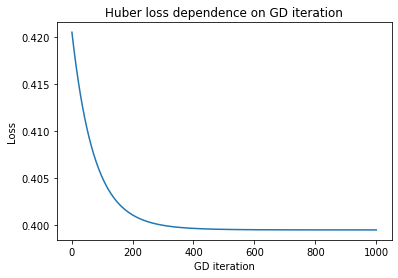

In [352]:
plt.plot(np.linspace(1, 1000, 1000), loss_history)
plt.title('Huber loss dependence on GD iteration')
plt.xlabel('GD iteration')
plt.ylabel('Loss')
plt.show()

In [353]:
from sklearn.linear_model import LinearRegression as LR

In [354]:
prediction = LR().fit(X_train, y_train)
y1_prediction = lrh.predict(X_test)
y2_prediction = prediction.predict(X_test)

In [355]:
print('MSE LR руками: ', mean_squared_error(y_test ,y1_prediction))
print('MSE LR sklearn: ', mean_squared_error(y_test ,y2_prediction))

MSE LR руками:  1.1624709678058285
MSE LR sklearn:  1.1640531058089236


In [356]:
print('calc_loss: ', lrh.calc_loss(X_train, y_train))

calc_loss:  0.4010621223385375


In [357]:
print('Grad:', lrh.calc_gradient(X_train, y_train))

Grad: [ 1.31291189e-03  4.92461828e-04  1.12666124e-03 -2.99330951e-03
 -7.10911438e-03 -9.44746551e-04  1.35746046e-05  9.05166109e-04
  2.14049859e-03 -9.66142137e-05 -5.95202900e-03  2.64112531e-03
 -8.80758113e-04  8.25010925e-03 -4.25374058e-03 -3.58562104e-03
 -2.64302471e-03 -5.50336765e-03 -1.32678807e-03 -8.73313830e-04
  5.53736064e-04 -6.80526544e-05 -1.49542935e-03 -8.08474254e-03
 -1.61540061e-03 -5.06909189e-03 -2.58478512e-03 -6.39544151e-03
  5.88586908e-03  1.40422964e-03 -4.96754572e-03  7.22765632e-04
 -1.51605134e-03 -3.34877659e-03 -4.00249626e-03 -1.55905574e-03
  3.22759412e-03 -7.06905889e-04 -2.62694164e-03 -8.05413749e-04
 -4.33761559e-03  5.17968823e-03 -3.99686200e-03  1.29118812e-03
  1.92020260e-03 -4.81685493e-03 -1.48506996e-03  2.73265855e-05
  6.06397883e-03 -4.20793751e-04]


# Практика (8 + 0.5*)

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder as LE, OneHotEncoder
from collections import Counter

%matplotlib inline

В этой части вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [4]:
data = pd.read_csv('train.csv', header=0)

In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data.drop('Id', axis=1, inplace=True)

In [8]:
data.shape

(1460, 80)

## 1 (1)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [9]:
data.isnull().any().any()

True

In [10]:
miss_sum_values = []
list_with_miss = []
da = data[data.columns[data.isnull().any() == 1]]
for i in da.columns:
    list_with_miss.append(i)
for j in range(len(da.columns)):
    miss_sum_values.append(da[list_with_miss[j]].isnull().sum())
    print('Количество пропусков в {:s} составляет {:f}, доля пропусков от общего числа значений: {:f}%'.format(list_with_miss[j], miss_sum_values[j], 100*miss_sum_values[j] / len(data)))

Количество пропусков в LotFrontage составляет 259.000000, доля пропусков от общего числа значений: 17.739726%
Количество пропусков в Alley составляет 1369.000000, доля пропусков от общего числа значений: 93.767123%
Количество пропусков в MasVnrType составляет 8.000000, доля пропусков от общего числа значений: 0.547945%
Количество пропусков в MasVnrArea составляет 8.000000, доля пропусков от общего числа значений: 0.547945%
Количество пропусков в BsmtQual составляет 37.000000, доля пропусков от общего числа значений: 2.534247%
Количество пропусков в BsmtCond составляет 37.000000, доля пропусков от общего числа значений: 2.534247%
Количество пропусков в BsmtExposure составляет 38.000000, доля пропусков от общего числа значений: 2.602740%
Количество пропусков в BsmtFinType1 составляет 37.000000, доля пропусков от общего числа значений: 2.534247%
Количество пропусков в BsmtFinType2 составляет 38.000000, доля пропусков от общего числа значений: 2.602740%
Количество пропусков в Electrical со

## 2 (1)

Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

Из уже найденных долей пропусков следует, что у некоторых признаков слишком много пропусков, то есть они не несут никакой важной информации, поэтому можем просто их удалить

In [366]:
data = data.drop(['Alley', 'Fence', 'PoolQC', 'MiscFeature', 'FireplaceQu'], axis=1)

In [367]:
#поймем какие значения принимают категориальные признаки с пропуском
values_of_columns = {}
for i in list_with_miss:
    all_missed_values = []
    try:
        for j in data[i]:
            all_missed_values.append(j)
        if len(set(all_missed_values)) < 15:
            values_of_columns.update({i : set(all_missed_values)})
            print(i, set(all_missed_values))
    except KeyError:
        pass

MasVnrType {nan, 'BrkCmn', 'BrkFace', 'Stone', 'None'}
BsmtQual {nan, 'Ex', 'Fa', 'TA', 'Gd'}
BsmtCond {nan, 'Fa', 'Po', 'TA', 'Gd'}
BsmtExposure {nan, 'Av', 'Gd', 'No', 'Mn'}
BsmtFinType1 {'Unf', nan, 'BLQ', 'ALQ', 'Rec', 'LwQ', 'GLQ'}
BsmtFinType2 {'Unf', nan, 'GLQ', 'BLQ', 'ALQ', 'Rec', 'LwQ'}
Electrical {nan, 'FuseA', 'FuseP', 'SBrkr', 'Mix', 'FuseF'}
GarageType {nan, 'Basment', 'BuiltIn', 'Attchd', 'CarPort', 'Detchd', '2Types'}
GarageFinish {'Unf', nan, 'RFn', 'Fin'}
GarageQual {nan, 'Ex', 'Fa', 'Po', 'TA', 'Gd'}
GarageCond {nan, 'Ex', 'Fa', 'Po', 'TA', 'Gd'}


In [368]:
#найдем теперь самые популярные значения и заполним ими пропуски
top_words = []
for i in values_of_columns:
    all_values_in_columns = ''
    for j in data[i]:
        try:
            all_values_in_columns += ' ' + str(j) + ' '
        except TypeError: 
            all_values_in_columns += str(' nan ')
    all_values_in_columns_list = re.findall(r'\w+', all_values_in_columns)
    word_counts = Counter(all_values_in_columns_list)
    top_words.append((i, word_counts.most_common(1)[0][0]))
for i in top_words:
    data[i[0]].fillna(i[1], inplace=True)

In [369]:
#вещественные признаки с пропусками заполним средним значением
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].mean(), inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(), inplace=True)

In [370]:
data.isnull().any().any()

False

## 3 (1)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование. Объясните выбор метода (one-hot-encoding, label encoding, ...)

Будем использовать one-hot-encoding для более корректного выявления корреляции признаков

In [371]:
#поймем какие признаки категориальные
category_names = []
for i in data.columns:
    if type(data[1:2][i].values[0]) == str:
        category_names.append(i)
print(category_names)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [372]:
#сделаем one hot encoding(через pd.get_dummies), создавая новый датафрейм
data_new = None
for i in category_names:
    data_category = data[i]
    data_new = pd.concat([data_new, pd.get_dummies(data_category,prefix=i)], axis=1, sort = False)

In [373]:
#объединим со старым и выбросим старые категориальные
data = pd.concat([data, data_new], axis=1, sort=False)
for i in category_names:
    data.drop(i, axis=1, inplace=True)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


## 4 (0.5)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

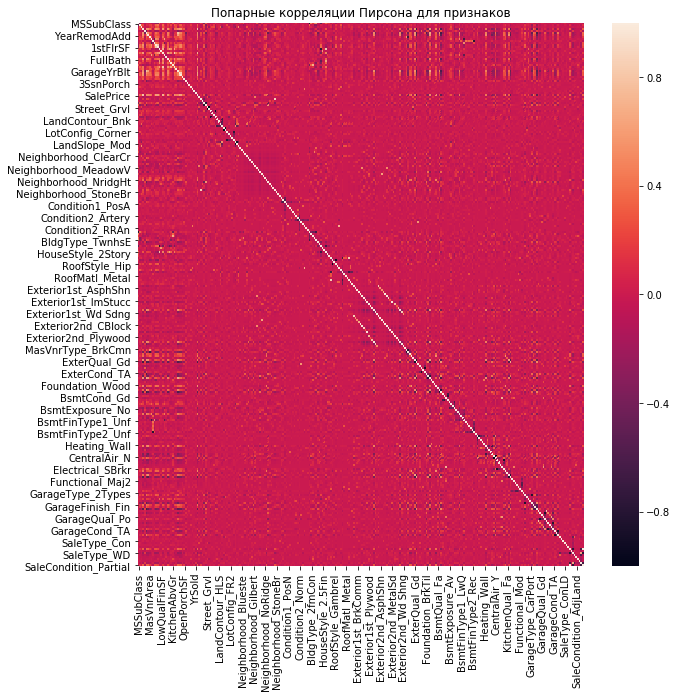

In [374]:
P_corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(P_corr)
plt.title('Попарные корреляции Пирсона для признаков')
plt.show()

## 5 (0.5)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [375]:
max_corr = 0
min_corr = 1
features_corr_max = []
features_corr_min = []
for i in range(len(P_corr)):
    if abs(P_corr['SalePrice'][i]) >= abs(max_corr) and abs(P_corr['SalePrice'][i]) != 1:
        max_corr = P_corr[P_corr.columns[i]]['SalePrice']
        features_corr_max.append(i)
    if abs(P_corr['SalePrice'][i]) <= abs(min_corr):
        min_corr = P_corr[P_corr.columns[i]]['SalePrice']
        features_corr_min.append(i)
#проверим на повторение значений корреляций
print('Для наибольшей корреляции один признак', P_corr['SalePrice'][features_corr_max[-2]] != max_corr)
print('Для наименьшей корреляции один признак', P_corr['SalePrice'][features_corr_min[-2]] != min_corr)
print('Наибольшая корреляция {:f} для признака {:s}'.format(max_corr, data.columns[features_corr_max[-1]]))
print('Наименьшая корреляция {:f} для признака {:s}'.format(min_corr, data.columns[features_corr_min[-1]]))

Для наибольшей корреляции один признак True
Для наименьшей корреляции один признак True
Наибольшая корреляция 0.790982 для признака OverallQual
Наименьшая корреляция 0.000076 для признака BsmtFinType2_GLQ


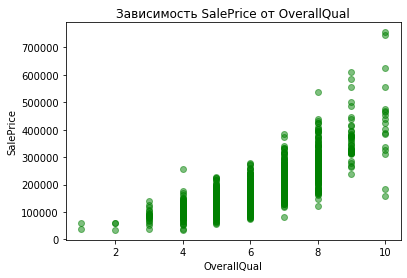

In [376]:
plt.subplots()
plt.scatter(data['OverallQual'], data['SalePrice'], color = 'g', alpha = 0.5)
plt.title('Зависимость SalePrice от OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

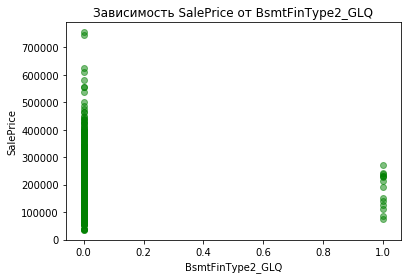

In [377]:
plt.subplots()
plt.scatter(data['BsmtFinType2_GLQ'], data['SalePrice'], color = 'g', alpha = 0.5)
plt.title('Зависимость SalePrice от BsmtFinType2_GLQ')
plt.xlabel('BsmtFinType2_GLQ')
plt.ylabel('SalePrice')
plt.show()

## 6 (0.5)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

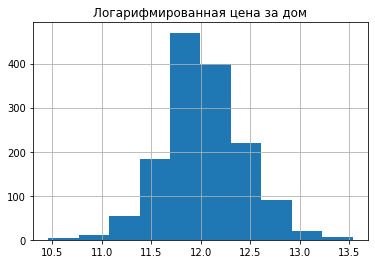

In [378]:
np.log1p(data['SalePrice']).hist()
plt.title('Логарифмированная цена за дом')
plt.show()

Из гистограммы видно, что логарифмированная цена за дом имеет нормальное распределение с медианной в примерно 12.

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [379]:
X_train, X_val, y_train, y_val = train_test_split(
    data.drop('SalePrice', axis=1),
    np.log1p(data['SalePrice']),
    random_state=13
)

In [380]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 270), (365, 270), (1095,), (365,))

## 7 (2)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [381]:
grid_searcher = GridSearchCV(
    KNeighborsRegressor(),
    param_grid={
        'n_neighbors': range(1, 100, 2),
        'weights': ['uniform', 'distance'],
        'p': [1, 2, 3]
    },
    cv=5
)
grid_searcher.fit(X_train, y_train)
KNN_best = grid_searcher.predict(X_val)
print(mean_squared_error(y_val, KNN_best)**0.5)

0.22417707365079576


In [382]:
grid_searcher = GridSearchCV(
    LinearRegression(),
    param_grid={
        'fit_intercept': [True, False],
        'normalize': [True, False]
    },
    cv=5
)
grid_searcher.fit(X_train, y_train)
LR_best = grid_searcher.predict(X_val)
print(mean_squared_error(y_val, LR_best)**0.5)

0.216717853571073


In [383]:
Lasso_best = Lasso().fit(X_train, y_train)
y_Lasso = Lasso_best.predict(X_val)
print(mean_squared_error(y_val ,y_Lasso)**0.5)

0.2904473472458797


In [384]:
#попробовал через кросс-валидацию найти, но все равно большая ошибка
grid_searcher = LassoCV(eps=1e-6, n_alphas=1000, tol=1e-5, cv=10)
grid_searcher.fit(X_train, y_train)
Lasso_best = grid_searcher.predict(X_val)
print(mean_squared_error(y_val, Lasso_best)**0.5)

0.22459145107847817


Но Ridge показывает себя лучше всех

In [385]:
#кросс-валидация на параметр alpha не дает ничего полезного, а вот при нормализации получаем маленькую ошибку
Ridge_best = Ridge(normalize=True).fit(X_train, y_train)
y_Ridge = Ridge_best.predict(X_val)
print(mean_squared_error(y_val ,y_Ridge)**0.5)

0.19131733456282557


## 8 (1)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

Для линейной регресии и Ridge видем нормальное распределение весов, а для Lasso неудачное распредление, так как оно показывает, что в этом методе на предсказание влияют только какие-то два признака, что не является признаком недообучения.
Ridge ведет себя как и линейная регрессия, так как по построению они отличаются только на регуляризацию. А Lasso выделяется так, потому что еще учитывает количество признаков, которых очень много, из-за чего и скапливает веса в одной точке.

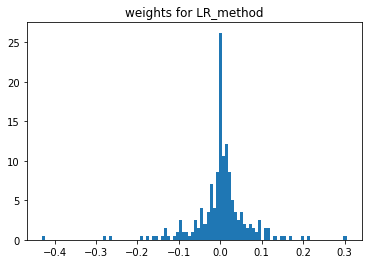

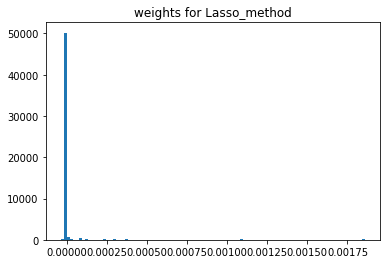

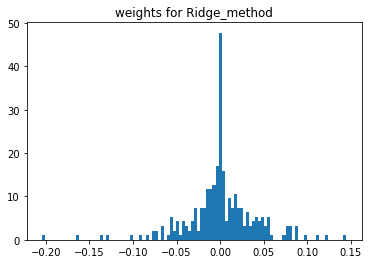

In [386]:
w4 = LR_method.coef_
w3 = Lasso_method.coef_
w2 = Ridge_method.coef_
plt.hist(w4, bins = 100, density = True)
plt.title('weights for LR_method')
plt.show()
plt.hist(w3, bins = 100, density = True)
plt.title('weights for Lasso_method')
plt.show()
plt.hist(w2, bins = 100, density = True)
plt.title('weights for Ridge_method')
plt.show()

## 9 (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.212 на валидации по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

In [387]:
Ridge_best = Ridge(normalize=True).fit(X_train, y_train)
y_Ridge = Ridge_best.predict(X_val)
mean_squared_error(y_val ,y_Ridge)**0.5

0.19131733456282557

## 10* (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.210 на валидации по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [388]:
Ridge_best = Ridge(normalize=True).fit(X_train, y_train)
y_Ridge = Ridge_best.predict(X_val)
mean_squared_error(y_val ,y_Ridge)**0.5

0.19131733456282557

# Теория (1.5*)

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

# Решение
Заметим, что в каждой функции $\rho_\tau (y_i - C)$  в обоих случаях есть слагаемое $\tau y_i$, то есть в общей сумме (которую мы минимизируем) эти слагаемые не зависят от $C$, поэтому про них можно забыть и переписать функцию $\rho_\tau$, обозначив новую через $f_\tau$:

$$
\rho_\tau(y_i - C) =
\begin{cases}
\tau (y_i - C), & y_i - C > 0\\
(\tau - 1)(y_i - C), & y_i - C \leq 0
\end{cases}
$$

$$
f_\tau(y_i - C) =
\begin{cases}
-\tau C, & y_i > C\\
-\tau C - y_i + C, & y_i \leq C
\end{cases}
$$

Далее, упорядочим все $y_i$ в порядке возрастания, возьмем такие $c_1, c_2, c_3$, что $y_{k-1} < c_3 \le y_k < c_2 < c_1 \le y_{k+1}$ (для просты будем считать, что $c_2 = c_1 - \varepsilon$, где $\varepsilon > 0$), и сравним их суммы, которые нам нужно минимизировать (назовем их соответственно $S_1, S_2, S_3$)

Тогда имеем, что 

$$
S_1 = -k\tau c_1 - \sum_{i=1}^k y_i + kc_1 - (l-k)\tau c_1\\
S_2 = -k\tau (c_1 - \varepsilon) - \sum_{i=1}^k y_i + k(c_1 - \varepsilon) - (l-k)\tau (c_1 - \varepsilon)\\
S_3 = -(k-1)\tau c_3 - \sum_{i=1}^{k-1} y_i + (k-1)c_1 - (l-k+1)\tau c_1
$$

Теперь посчитаем разности между $S_1$ и $S_2, S_3$

$$
S_1 - S_2 = -k \tau \varepsilon + k\varepsilon - (l-k)\varepsilon \tau = (k-l\tau)\varepsilon\\
S_1 - S_3 = -k\tau (с_1-с_3) - \tau c_3 - y_k + k(c_1-c_3) + c_3 - (l-k)\tau(c_1-c_3) + \tau c_3 = (с_1-с_3)(k-l\tau) + c_3 - y_k
$$

Отсюда можно сделать несколько выводов:

Во-первых, если $(k-l\tau) = 0$, то значение суммы на участке $[y_{k};y_{k+1}]$ будет одинаковым (так как разница сумм для двух констант на нем зависит только от этого значения).

Во-вторых, если $(k-l\tau) < 0$, то $S_1 - S_3 = (с_1-с_3)(k-l\tau) + c_3 - y_k < 0$ (так как еще $с_1-с_3 > 0$, $c_3 - y_k < 0$), тогда следует, что при таком k сумма при $c_1$ будет меньше, чем при $c_3$, а также и при $c_2$ ($S_1 - S_2 = (k-l\tau)\varepsilon < 0$). Тогда еще меньше будет при $c_1 = y_{k+1}$ (двигаемся на $\varepsilon$ до края).

В-третьих, если $(k-l\tau) > 0$, то $S_1 > S_2$, откуда минимальная сумма будет при $c_2$, тогда можно еще сдвинуться на $\varepsilon$ до $y_k$.

Тогда становится понятно, что если постепенно увеличивать k, то есть увеличивать константы (они зависят от тех $y_{k-1}, y_k, y_{k+1}$, которые мы выбрали), то получим из второго вывода, что с каждым разом сумма будет уменьшаться (будем предполагать, что при $k = 1$ имеем $(k-l\tau) < 0$. Более того из первого вывода получаем, что, дойдя до того значения k, где $(k-l\tau) = 0$, все суммы на участке $[y_{k};y_{k+1}]$ будут равны, а если еще увеличить k на 1, то из третьего вывода получаем, что сумма вырастет, так как тогда $(k-l\tau) > 0$. 

Если же такого k, что $(k-l\tau) = 0$ не существует, то при таком переходе и из третьего и второго вывода становится понятно, что минимальная сумма будет как раз при $c = y_k$.

Кроме того, может произойти и так, что уже при $k=1$ будет $(k-l\tau) > 0$, тогда из второго вывода становится понятно, что минимальная сумма будет при $c=y_{min}$.

А случая когда при всех k $(k-l\tau) < 0$ не может быть по условию, так как $1 -\tau > 0$, тогда для $k=l$ имеем, что $l - l\tau = l(1-\tau)>0$.

Подводя итог, можно вывести такую формулу для нужной константы, минимизирующая сумму:

$$
C^* = \begin{cases}
y_k, \text{если } \exists k, k\in \mathbb {N}: k - l\tau > 0 \text{ и } k-1 - l\tau < 0\\
[y_{k};y_{k+1}], \text{если }\exists k, k \in \mathbb {N}: k - l\tau = 0\\
y_{min}, \text{если } (1-l\tau) > 0
\end{cases}
$$

## 2* (0.5)

Алгоритм регрессии выдает константный ответ для любого объекта: $a(x) = C$. Найдите $C$, при котором средняя абсолютная ошибка на обучающей выборке $\{(x_1, y_1), \ldots, (x_\ell, y_\ell)\}$ будет минимальной.

# Решение

Заметим, что задача минимизации сводится к такой:

$$
MSE= \dfrac{1}{l} \sum_{i=1}^l |y_i-a(x_i)| = \dfrac{1}{l} \sum_{i=1}^l |y_i-C| \rightarrow \min_{C}
$$
То есть это можно свести к задаче 
$$\sum_{i=1}^l |y_i-C| \rightarrow \min_{C}$$

Рассмотрим 2 случая: когда в обучающей выборке количество элементов четное количество и нечетное

* 1 случай

Пусть l = 2k. Тогда задача сводится к такой

$$\sum_{i=1}^{2k} |y_i-C| \rightarrow \min_{C}$$
FOC:
$$
\sum_{i=1}^{2k} sign(C-y_i) = 0
$$

Откуда следует, что только при $C\in(y_k;y_{k+1})$ условие первого порядка будет выполнено (чтобы каждый элемент как бы сокращался с симметричным ему (1 и -1 сокращались друг с другом)), то есть изначальная функция будет минимальна (условие второго порядка будет выполнено, так как вторая производная будет нулевой при любых $C$)

* 2 случай

Пусть l = 2k+1. Тогда задача сводится к такой

$$\sum_{i=1}^{2k+1} |y_i-C| \rightarrow \min_{C}$$
FOC:
$$
\sum_{i=1}^{2k+1} sign(C-y_i) = 0
$$

Откуда следует, что только при $C=y_k$ условие первого порядка будет выполнено (иначе элементов 1 или -1 будет на один больше и сумма не будет равняться 0), то есть изначальная функция будет минимальна (условие второго порядка будет выполнено, так как вторая производная будет нулевой при любых $C$)

Подводя итог, получаем, что

$$
C^* = \begin{cases}
(y_{k};y_{k+1}), \text{если } l = 2k\\
y_k, \text{если } l = 2k+1
\end{cases}
$$

## 3* (0.5)

Гарри Поттер хочет найти философский камень, расположенный в точке минимума функции $f(x_1, x_2)=x_1^2 + x_2^2$. В момент времени 0 он стартует из точки $x^{(0)}=(2, 2)$. На $i$-й минуте Гарри мгновенно перемещается (аппарирует) из точки $x^{(i)}$ в точку

$$
x^{(i+1)} = x^{(i)} - \eta \nabla f(x^{(i)}),
$$

где $\nabla f(x^{(i)})$ — градиент $f$ в точке $x^{(i)}$, $\eta \ge 0$ — фиксированное число. Опишите судьбу Гарри в зависимости от значения $\eta$. При каких значениях $\eta$ Гарри подойдёт к философскому камню сколь угодно близко? Сколько итераций ему понадобится, чтобы подойти к философскому камню на расстояние не больше $\varepsilon$?

# Решение

Докажем методом математической индукции, что на $i$ шаге Гарри будет на расстоянии 

$$
x^{(i)} = (2(1-2\eta)^i, 2(1-2\eta)^i)
$$

База математической индукции:

$$
i=0\\
x^{0} = (2(1-2\eta)^0, 2(1-2\eta)^0) = (2, 2)
$$

Пусть для $i = n$ это утверждение верно, тогда докажем, что оно верно и для $i=n+1$. Будем доказывать только для одной координаты, так как все операции делаются по координатно, а градиент $\nabla f(x^{(i)} = (2x^{(i)}_1, 2x^{(i)}_2,)$ является симметричным для обоих координат.

Посчитаем по формуле первую координату на $n+1$ шаге (формула для нее на следующем шаге такая же, как и для всего вектора):

$$
x^{(n+1)}_1 = x^{(n)}_1 - 2 \eta x^{(n)}_1 = 2(1-2\eta)^n - 4\eta (1-2\eta)^n = 2(1-2\eta)^{n+1}
$$

Что и требовалось доказать.

Отсюда следует, что расстояние до философского камня на шаге k, который лежит в точке (0,0) будет равно:

$$
distance(x^*, x^{k}) = \sqrt{((1-2\eta)^k-0)^2 + ((1-2\eta)^k-0)^2} = \sqrt{2}|1-2\eta|^k
$$

Отсюда следует, что Гарри Поттер будет к философскому камню сколь угодно близко при условии, что это расстояние стремится к 0, что верно при $|1-2\eta| < 1$, то есть $\eta \in (0;1) $

Чтобы понять в какой момент он приблизится на расстояние $\varepsilon$ нужно решить неравенство (пусть он это сделает на m-ом шаге):

$$
distance(x^*, x^{m}) = \sqrt{2}|1-2\eta|^m \le \varepsilon\\
m \ln{|1-2\eta|} \le \ln{\dfrac{\varepsilon}{\sqrt{2}}}\\
m \ge \dfrac{\ln{\dfrac{\varepsilon}{\sqrt{2}}}}{\ln{|1-2\eta|}}\\
m \ge \log_{|1-2\eta|} \dfrac{\varepsilon}{\sqrt{2}}
$$